In [1]:

import cooler
import numpy as np
import pandas as pd
import glob, os
import matplotlib.pyplot as plt
import numpy as np
from hmmlearn import hmm
from scipy.stats import zscore
from scipy.stats import pearsonr
from matplotlib.colors import BoundaryNorm
from sklearn.cluster import KMeans
##################




In [2]:
file_name = np.load("Rao2014-GM12878-MboI-allreps-filtered_100kb_inter.npz")
data_matrix=np.matrix(file_name['arr_0'][:])
print(data_matrix.shape)
A=data_matrix

(14119, 14704)


/home/ba69w/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


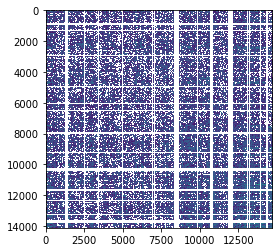

In [3]:
plt.imshow(np.log(data_matrix))

In [4]:
A = np.array(A)
A[~np.isfinite(A)] = 0


In [5]:
mask_col=np.nansum(A,axis=0)>0
mask_row=np.nansum(A,axis=1)>0

print(mask_row.sum())
print(mask_col.sum())
print(mask_row.shape)
print(mask_col)


13034
12992
(14119,)
[False False False ...  True  True False]


In [6]:
mask_col.shape

(14704,)

In [7]:
#plt.imshow(np.log(A[:,mask_col]))

In [8]:
A_log=np.log(A[:,mask_col][mask_row,:])


/home/ba69w/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [9]:
#print(np.isfinite(A_log))
print(np.isinf(A_log))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [10]:
A_log[np.isinf(A_log)] = 0

In [11]:
#plt.imshow(A_log)
A_log.shape

(13034, 12992)

In [12]:
A_log[np.isnan(A_log)] = 0
#A_zscore_row=zscore(A_log,axis=0,ddof=1)

In [13]:

A_zscore_row=zscore(A_log,axis=0)

A_log_T=A_log.T
A_zscore_col=zscore(A_log_T,axis=0)


#data_matrix_zscore_row[np.isnan(data_matrix_zscore_row)] = 0



In [14]:
A_zscore_row.shape
print(A_zscore_row)

[[-0.40698154 -0.5341429  -0.58055612 ... -0.37514117 -0.18785092
  -0.00630926]
 [-0.59783614 -0.45291163 -0.58587884 ... -0.48111173 -0.12212575
  -0.27446608]
 [-0.38309006 -0.52269994 -0.39710928 ... -0.19183293 -0.20402097
  -0.24010827]
 ...
 [ 0.05640954  0.12951487  0.02663436 ...  0.42968241  0.42844509
   0.35260834]
 [ 0.08313843  0.18281669  0.00792065 ...  0.45883322  0.52735638
   0.4861881 ]
 [ 0.12938988  0.10337758 -0.02483822 ...  0.55673602  0.64362066
   0.60488442]]


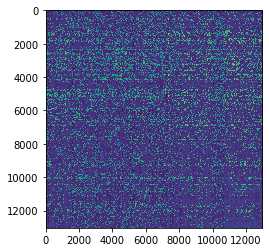

In [15]:
plt.imshow(A_zscore_row)

In [16]:
kmeans_clust_row = KMeans(n_clusters=5, random_state=0).fit(A_zscore_row)

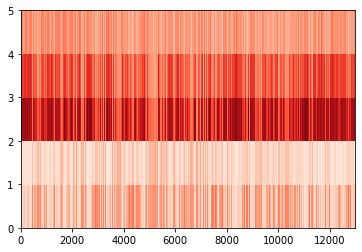

In [17]:
plt.pcolormesh(kmeans_clust_row.cluster_centers_,cmap=plt.get_cmap("Reds"))

In [18]:
np.bincount(kmeans_clust_row.labels_)

array([2480, 5111, 1272, 2011, 2160])

In [19]:
kmeans_clust_col = KMeans(n_clusters=5, random_state=0).fit(A_zscore_col)

[[-1.32050831e-01 -1.30914978e-01 -1.66199597e-01 ... -2.39291133e-01
  -2.46345774e-01 -2.80643908e-01]
 [ 1.68993863e+00  1.83137181e+00  2.40701810e+00 ... -3.26712047e-01
  -3.24791703e-01  2.04617459e+00]
 [ 3.10646232e-01  3.03374519e-01  4.23281429e-01 ...  5.90904466e-01
   6.42083412e-01  6.88480620e-01]
 [ 3.74455697e-02  4.04695786e-02  8.50632106e-04 ... -7.14769566e-02
  -7.33718302e-02 -6.58250818e-02]
 [ 7.36855885e-02  7.22815267e-02  1.27697623e-01 ...  2.96970350e-01
   2.78027696e-01  3.27004613e-01]]


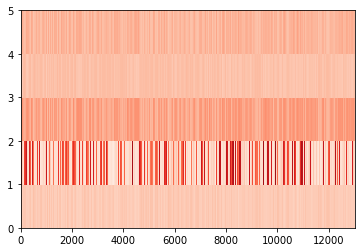

In [20]:
plt.pcolormesh(kmeans_clust_col.cluster_centers_,cmap=plt.get_cmap("Reds"))
print(kmeans_clust_col.cluster_centers_)

In [21]:
np.bincount(kmeans_clust_col.labels_)

array([6184,    1, 1762, 2875, 2170])

In [22]:
print(np.sum(np.bincount(kmeans_clust_col.labels_)))
print(np.sum(np.bincount(kmeans_clust_row.labels_)))

12992
13034


In [23]:
mask_col.shape

(14704,)

In [24]:
#row_labels = np.full(mask_row.shape,np.nan)
#row_labels[mask_row] = kmeans_clust_row.labels_

#col_labels = np.full(mask_col.shape,np.nan)
#col_labels[mask_col] = kmeans_clust_col.labels_

In [25]:
#plt.plot(col_labels)

In [26]:
 def quantify_cluster_interacions(A, row_labels, col_labels):
    # finish yourslef by doing np.unique of something like that
    number_of_unique_row_labels = np.unique(row_labels)
    number_of_unique_col_labels = np.unique(col_labels)
    print(number_of_unique_row_labels)
    print(number_of_unique_col_labels)

    # output array of mean-interactions for each pairs of clusters ...
    S = np.zeros((len(number_of_unique_row_labels),len(number_of_unique_col_labels)))

    for i in range(len(number_of_unique_row_labels)):
        row_mask = (row_labels == i)
        print(row_labels.shape)
        for j in range(len(number_of_unique_col_labels)):
            col_mask = (col_labels == j)
            print(col_labels.shape)
            # saddle-plot style
            # extracting interaction values
            # corresponding to row_cluster i
            # and col_cluster j:
            print(A.shape)
            data = A[row_mask, :][:, col_mask]
            #data = A[:, row_mask][col_mask, :]
            # data = data[np.isfinite(data)]
            S[i, j] += np.nanmean(data)

    return S

In [27]:
ff=quantify_cluster_interacions(A_log, kmeans_clust_row.labels_, kmeans_clust_col.labels_)
print(ff)
import random
#a= random.sample(list(kmeans_clust_row.labels_),len(kmeans_clust_row.labels_))


[0 1 2 3 4]
[0 1 2 3 4]
(13034,)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(13034,)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(13034,)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(13034,)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(13034,)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
[[-10.28989169  -6.83306215  -6.68178727  -9.4504444   -7.98047812]
 [-10.53982261  -8.28395478  -7.69026734 -10.04060101  -8.98952451]
 [ -7.14203033  -6.14659829  -5.8662648   -6.43075268  -6.74378683]
 [ -8.29083753  -7.04057248  -6.72353639  -7.51551814  -7.69100254]
 [ -9.38723963  -7.92080791  -7.31094933  -8.57315328  -8.3

In [28]:
# shuffle row_label and col_label ...
S_shuf_list = []
for iteration in range(5):
    rowl=np.copy(kmeans_clust_row.labels_)
    np.random.shuffle(rowl)
    coll=np.copy(kmeans_clust_col.labels_)
    np.random.shuffle(coll)
    #rowl = random.sample(list(kmeans_clust_row.labels_),len(kmeans_clust_row.labels_))
    #print(rowl)
    #coll = random.sample(list(kmeans_clust_col.labels_),len(kmeans_clust_col.labels_))
    #print(coll)
    S_shuf = quantify_cluster_interacions(A_log, np.array(rowl),np.array( coll))
    S_shuf_list.append(S_shuf)


[0 1 2 3 4]
[0 1 2 3 4]
(13034,)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(13034,)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(13034,)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(13034,)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(13034,)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
[0 1 2 3 4]
[0 1 2 3 4]
(13034,)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(13034,)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(12992,)
(13034, 12992)
(13034,)
(12992,)
(13034, 12992)
(12992,)
(13034,

[[-8.91651123 -9.57565342 -8.91177027 -8.9107421  -8.90552363]
 [-8.9170175  -9.58852309 -8.91387731 -8.90990593 -8.90625601]
 [-8.89894277 -9.5614254  -8.8929235  -8.88948971 -8.88793151]
 [-8.91160988 -9.59180148 -8.90567668 -8.90524995 -8.90098588]
 [-8.89275459 -9.58257764 -8.88929404 -8.88712994 -8.88344703]]
[[1.154  0.7136 0.7498 1.0606 0.8961]
 [1.182  0.8639 0.8627 1.1269 1.0093]
 [0.8026 0.6429 0.6597 0.7234 0.7588]
 [0.9303 0.734  0.755  0.8439 0.8641]
 [1.0556 0.8266 0.8224 0.9647 0.9438]]


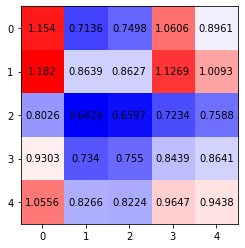

In [29]:
#print(S_shuf_list)
S_normalization = np.mean(S_shuf_list,axis=0)

print(S_normalization)
#finally normalized strength of cluster-to-cluster interaction:
S_final = np.round(ff/S_normalization,4)
print(S_final)
plt.imshow(S_final,cmap="bwr")
for (j,i),label in np.ndenumerate(S_final):
    plt.text(i,j,label,ha='center',va='center')
    

In [30]:
Sf = S_final
Sf

array([[1.154 , 0.7136, 0.7498, 1.0606, 0.8961],
       [1.182 , 0.8639, 0.8627, 1.1269, 1.0093],
       [0.8026, 0.6429, 0.6597, 0.7234, 0.7588],
       [0.9303, 0.734 , 0.755 , 0.8439, 0.8641],
       [1.0556, 0.8266, 0.8224, 0.9647, 0.9438]])

[[1.154  0.7136 0.7498 1.0606 0.8961]
 [1.182  0.8639 0.8627 1.1269 1.0093]
 [0.8026 0.6429 0.6597 0.7234 0.7588]
 [0.9303 0.734  0.755  0.8439 0.8641]
 [1.0556 0.8266 0.8224 0.9647 0.9438]]
0
[[1.0606 0.8961 0.7136 0.7498]
 [1.1269 1.0093 0.8639 0.8627]
 [0.7234 0.7588 0.6429 0.6597]
 [0.8439 0.8641 0.734  0.755 ]
 [0.9647 0.9438 0.8266 0.8224]]
2
[[0.8961 0.7136 0.7498]
 [1.0093 0.8639 0.8627]
 [0.7588 0.6429 0.6597]
 [0.8641 0.734  0.755 ]
 [0.9438 0.8266 0.8224]]
0
[[0.7498 0.7136]
 [0.8627 0.8639]
 [0.6597 0.6429]
 [0.755  0.734 ]
 [0.8224 0.8266]]
1


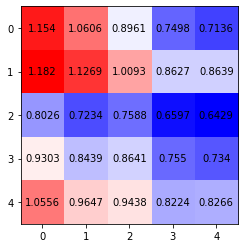

In [31]:
m1=Sf.argmax(axis=1)[0]
S1 = np.roll(Sf,-m1,axis=1)
print(S1)
print(m1)
m2=S1[:,1:].argmax(axis=1)[0]
S2 = np.roll(S1[:,1:],-m2,axis=1)
print(S2)
print(m2)
m3=S2[:,1:].argmax(axis=1)[0]
S3 = np.roll(S2[:,1:],-m3,axis=1)
print(S3)
print(m3)
m4=S3[:,1:].argmax(axis=1)[0]
S4 = np.roll(S3[:,1:],-m4,axis=1)
print(S4)
print(m4)
#S5=np.concatenate([S1[:,0:1],S2[:,0:1]],axis=1)
S5=np.concatenate([S1[:,0:1],S2[:,0:1],S3[:,0:1],S4[:,:]],axis=1)

#SSS = np.roll(np.roll(Sf,-3,axis=1),-3,axis=0)

# for row in Sf:
#     max_idx = np.argmax(row)
    

# SSS = np.roll(np.roll(Sf,-1,axis=1),-1,axis=0)
plt.imshow(S5,cmap='bwr')
for (j,i),label in np.ndenumerate(S5):
    plt.text(i,j,label,ha='center',va='center')

[[1.182  1.1269 1.0093 0.8627 0.8639]
 [0.8026 0.7234 0.7588 0.6597 0.6429]
 [0.9303 0.8439 0.8641 0.755  0.734 ]
 [1.0556 0.9647 0.9438 0.8224 0.8266]
 [1.154  1.0606 0.8961 0.7498 0.7136]]
1
[[1.1269 1.0093 0.8627 0.8639]
 [0.7234 0.7588 0.6597 0.6429]
 [0.8439 0.8641 0.755  0.734 ]
 [0.9647 0.9438 0.8224 0.8266]
 [1.0606 0.8961 0.7498 0.7136]]
0
[[1.0093 0.8627 0.8639]
 [0.7588 0.6597 0.6429]
 [0.8641 0.755  0.734 ]
 [0.9438 0.8224 0.8266]
 [0.8961 0.7498 0.7136]]
0
[[0.8627 0.8639]
 [0.6597 0.6429]
 [0.755  0.734 ]
 [0.8224 0.8266]
 [0.7498 0.7136]]
0


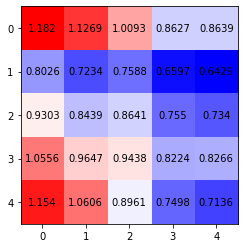

In [32]:
m1=S5.argmax(axis=0)[0]
S1 = np.roll(S5,-m1,axis=0)
print(S1)
print(m1)
m2=S1[:,1:].argmax(axis=0)[0]
S2 = np.roll(S1[:,1:],-m2,axis=0)
print(S2)
print(m2)
m3=S2[:,1:].argmax(axis=0)[0]
S3 = np.roll(S2[:,1:],-m3,axis=0)
print(S3)
print(m3)
m4=S3[:,1:].argmax(axis=0)[0]
S4 = np.roll(S3[:,1:],-m4,axis=0)
print(S4)
print(m4)
#S5=np.concatenate([S1[:,0:1],S2[:,0:1]],axis=1)
S55=np.concatenate([S1[:,0:1],S2[:,0:1],S3[:,0:1],S4[:,:]],axis=1)
plt.imshow(S55,cmap='bwr')
for (j,i),label in np.ndenumerate(S55):
    plt.text(i,j,label,ha='center',va='center')


2
2
2
2
2


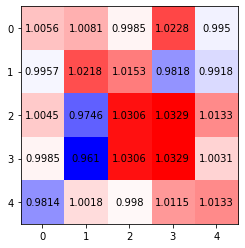

In [45]:
Sf=S_final

#print(np.amax(Sf,axis=0))
S=np.zeros((5,5))

for i in range(5):
    for j in range(5):
        if i==j:
            #print(i,j)
            pos = np.where(Sf == np.amax(Sf,axis=0))[0][j]
            print(pos)
            S[i,j]=np.amax(Sf,axis=0)[i]
            Sf[pos,j]=Sf[i,j]
        else:
            #print(i,j)
            S[i,j]=Sf[i,j]

plt.imshow(S,cmap="bwr")
for (j,i),label in np.ndenumerate(S):
    plt.text(i,j,label,ha='center',va='center')

[1.0052 1.0216 1.0305 1.0329 1.014 ]
2
0.9979
2
1.0153
2
1.0053
2
1.0305
3
1.0119


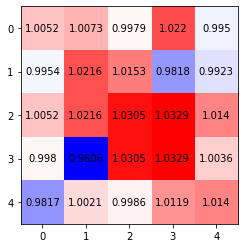

In [126]:
Sf=S_final
print(np.amax(Sf,axis=0))
#print(Sf)

# argmax return the index of the max number

#order=np.argmax(np.array(S_final), axis=1)
#array([2, 0, 1]) #Goal column indices
#print(order)
S=np.zeros((5,5))

for i in range(5):
    for j in range(5):
        if i==j:
            pos = np.where(Sf == np.amax(Sf,axis=0))[0][i]
            print(pos)
            print(Sf[i,j])
            Sf[i,j]=
            #np.fill_diagonal(S,np.amax(Sf,axis=0))
            S[i,j]=np.amax(Sf,axis=0)[i]
            #Sf=np.delete(Sf)
            #Sf[i,j]=Sf[i,pos]
        else:
            S[i,j]=Sf[i,j]
            
plt.imshow(S,cmap="bwr")
for (j,i),label in np.ndenumerate(S):
    plt.text(i,j,label,ha='center',va='center')        
        

TypeError: Invalid shape (5, 1, 5) for image data

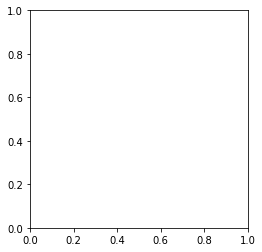

In [65]:
plt.imshow(S,cmap="bwr")
for (j,i),label in np.ndenumerate(S):
    plt.text(i,j,label,ha='center',va='center')
  

In [ ]:
#r1_cols[::÷]
plt.imshow(r1_cols[[0,3,4,2,1]], cmap="bwr")
for (j,i),label in np.ndenumerate(r1_cols):
    plt.text(i,j,label,ha='center',va='center')
    


In [73]:
row_clusters = np.full(mask_row.shape,np.nan)
row_clusters[mask_row] = kmeans_clust_row.cluster_centers_[0]

col_clusters = np.full(mask_col.shape,np.nan)
col_clusters[mask_col] = kmeans_clust_col.cluster_centers_[0]



In [79]:
print(col_clusters.shape)
print(row_clusters.shape)

(1472,)
(1415,)


ValueError: x and y must have length at least 2.